# Figures: cross-validation results

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from plot_utils import adjust_spines

import warnings

In [2]:
data = pickle.load(open('../data/purkinje_sRRR.pickle', 'rb'))
cell_names = data['cell_names']

In [4]:
purkinjecv_linear = pickle.load(open('../pickles/cvresults-Linear.pickle', 'rb'))
purkinjecv_nonlinear = pickle.load(open('../pickles/cvresults-Nonlinear.pickle', 'rb'))
purkinjecv_full = pickle.load(open('../pickles/cvresults-Full.pickle', 'rb'))

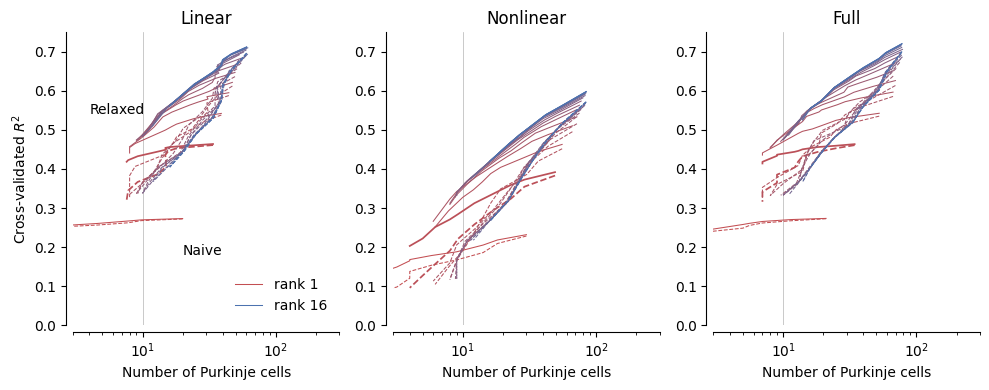

In [5]:
colA = np.array([76, 114, 176]) / 256
colB = np.array([196, 78, 82])  / 256

fig, axes = plt.subplots(1,3,figsize=(10,4))
ylims = [.75, .75, .75]
titles = ['Linear', 'Nonlinear', 'Full']
for i, cvresults in enumerate([purkinjecv_linear, purkinjecv_nonlinear, purkinjecv_full]):
    
    maxRank = len(cvresults)
    for rank in range(1,maxRank+1):
        # suppressing "mean of empty slice" warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            n = np.nanmean(cvresults[rank][2], axis=(0,1))
            c = np.nanmean(cvresults[rank][0], axis=(0,1))
            cr = np.nanmean(cvresults[rank][1], axis=(0,1))
    
        if rank==2:
            lw = 1.25
        else:
            lw = .75
        col = (colA * (rank-1)/(maxRank-1) + colB * (maxRank-rank)/(maxRank-1))
        if rank==1 or rank==maxRank:
            axes[i].plot(n, cr, color=col, linewidth=lw, label='rank {}'.format(rank))
        else:
            axes[i].plot(n, cr, color=col, linewidth=lw)    
        axes[i].plot(n, c, '--', color=col, linewidth=lw)

    if i==0:
        axes[i].legend(loc='lower right', frameon=False)
        axes[i].text(4, .54, 'Relaxed', fontsize=10)
        axes[i].text(20, .18, 'Naive', fontsize=10)
        axes[i].set_ylabel(r'Cross-validated $R^2$')
    axes[i].set_xscale('log')
    axes[i].set_xlabel('Number of Purkinje cells')#, labelpad=-3)
    axes[i].set_title(titles[i])
    axes[i].set_ylim([0, ylims[i]])
    axes[i].set_xlim([3, 300])
    axes[i].plot([10,10], [0,ylims[i]], color=[.7,.7,.7], linewidth=.5, zorder=0)

for ax in axes.flatten():
    adjust_spines(ax, ['bottom', 'left'])

plt.tight_layout()

plt.savefig('cv.png', dpi=200)
plt.savefig('cv.pdf')

Example:

In [7]:
# First index in dictionary (!) = rank; here rank=2 (index is from dict)
# Second index is in list; here 1 = relaxed r2 results
#                          (0: r2 results, 2: corr results, 3: relaxed corr results, 4: sum of nonzero cells,
#                           5: selected cells, 6: W row L2 norms, 7: relaxed W row L2 norms)
# Third, Fourth, Fifth, Sixth index (all in list): validation fold=3, rep=0, alpha_id = 8, l1_ratio_id=0
# If second index is 5 (selected cells), then you also have a Seventh index : cell_ids
# 
# e.g: 
purkinjecv_linear[2][1][3,0,8,0]

0.42301377186569533

In [9]:
purkinjecv_full[2][5][0][0][7][0]

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False])

In [10]:
purkinjecv_full[2][7][0][0][7][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31680591, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41020597, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.41602976, 0.        , 0.50588592,
       0.        , 0.        , 0.45524986, 0.        , 0.        ,
       0.33579714, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33987277, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

So how many times did cells get selected across linear/nonlinear/full models?

In [ ]:
ranks = len(purkinjecv_linear)
folds = purkinjecv_linear[2][5].shape[0]
reps = purkinjecv_linear[2][5].shape[1]
alphas = purkinjecv_linear[2][5].shape[2]
l1_ratios = purkinjecv_linear[2][5].shape[3]
n_neurons = purkinjecv_linear[2][5].shape[-1]

print('Ranks: ', ranks, '\nFolds: ', folds, '\nReps: ', reps, '\nAlphas: ', alphas, '\nL1 ratios: ', l1_ratios, '\n# Neurons: ', n_neurons)

Ranks:  16 
Folds:  5 
Reps:  1 
Alphas:  13 
L1 ratios:  1 
# Neurons:  91


(3, 91)

In [ ]:
total_models=0
times_selected = np.zeros((3,n_neurons),dtype='int')
for i, cvresults in enumerate([purkinjecv_linear, purkinjecv_nonlinear, purkinjecv_full]):
    selected = []
    for r in range(1,ranks+1):
        for f in range(folds):
            for rep in range(reps):
                for a in range(alphas):
                    for l in range(l1_ratios):
                        selected.append(cvresults[r][5][f,rep,a,l,:][:,np.newaxis])
                        if i==0:
                            total_models+=1
    selected=np.concatenate(selected,axis=1)
    times_selected[i,:]=selected.sum(axis=1)

In [13]:
total_models

1040

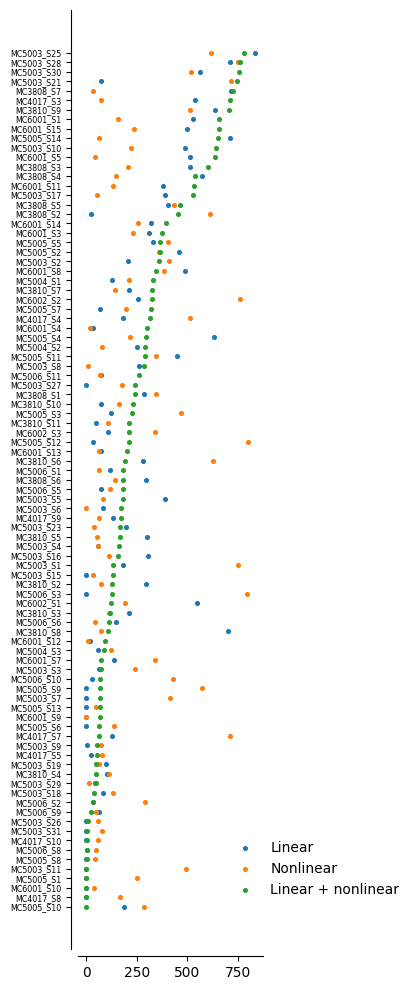

In [14]:
order=np.argsort(times_selected[-1,:]) # We take the linear + nonlinear model for order of neurons

fig, ax = plt.subplots(1,1,figsize=(4,10))
ax.scatter(times_selected[0,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear', s=7)
ax.scatter(times_selected[1,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Nonlinear', s=7)
ax.scatter(times_selected[2,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear + nonlinear', s=7)
ax.set_yticks(np.linspace(1,n_neurons,num=n_neurons))
ax.set_yticklabels(cell_names[order])
ax.tick_params(axis='y', which='major', labelsize=5.7)
ax.legend(frameon=False, loc=(.8,.05))
adjust_spines(ax,['left','bottom'])
plt.tight_layout()

plt.savefig('selection.png', dpi=200)
plt.savefig('selection.pdf')

What about models for which always around 10 cells were selected? Which cells are these?

In [ ]:
# checking
r=2
f=2
rep=0
l1_ratio_id=0
print(cvresults[r][2][f,rep,:,l1_ratio_id])
index = np.nanargmin(np.abs(np.array(cvresults[r][2][f,rep,:,l1_ratio_id])-10.))
print(index)

[34. 25. 19. 14. 13. 12.  9.  9.  7.  7. nan nan nan]
6


In [88]:
total_models=0
n_cells = 10 # choose amount of cells
times_selected = np.zeros((3,n_neurons),dtype='int')
for i, cvresults in enumerate([purkinjecv_linear, purkinjecv_nonlinear, purkinjecv_full]):
    selected = []
    for r in range(1,min(n_cells+1,ranks+1)):
        for f in range(folds):
            for rep in range(reps):
                for l in range(l1_ratios):
                    a_index = np.nanargmin(np.abs(np.array(cvresults[r][2][f,rep,:,l])-n_cells))
                    selected.append(cvresults[r][5][f,rep,a_index,l,:][:,np.newaxis])
                    if i==0:
                        total_models+=1
    selected=np.concatenate(selected,axis=1)
    times_selected[i,:]=selected.sum(axis=1)

In [89]:
total_models

50

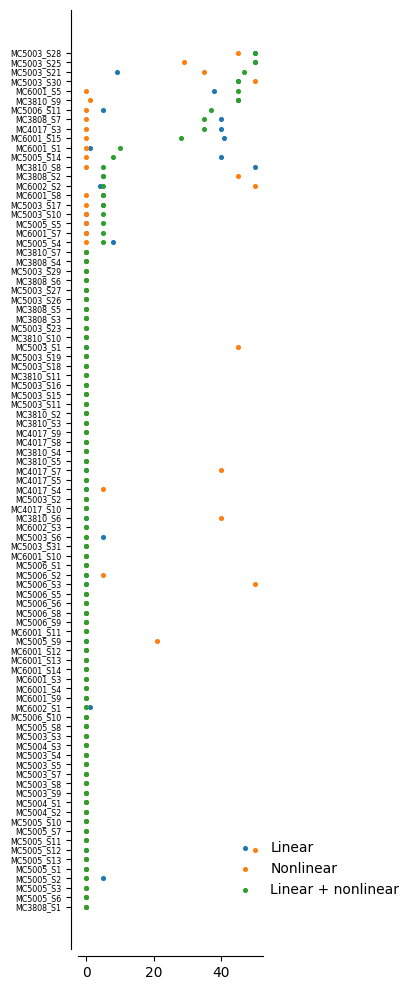

In [41]:
order=np.argsort(times_selected[-1,:]) # We take the linear + nonlinear model for order of neurons

fig, ax = plt.subplots(1,1,figsize=(4,10))
ax.scatter(times_selected[0,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear', s=7)
ax.scatter(times_selected[1,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Nonlinear', s=7)
ax.scatter(times_selected[2,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear + nonlinear', s=7)
ax.set_yticks(np.linspace(1,n_neurons,num=n_neurons))
ax.set_yticklabels(cell_names[order])
ax.tick_params(axis='y', which='major', labelsize=5.7)
ax.legend(frameon=False, loc=(.8,.05))
adjust_spines(ax,['left','bottom'])
plt.tight_layout()

plt.savefig('selection_{}.png'.format(n_cells), dpi=200)
plt.savefig('selection_{}.pdf'.format(n_cells))

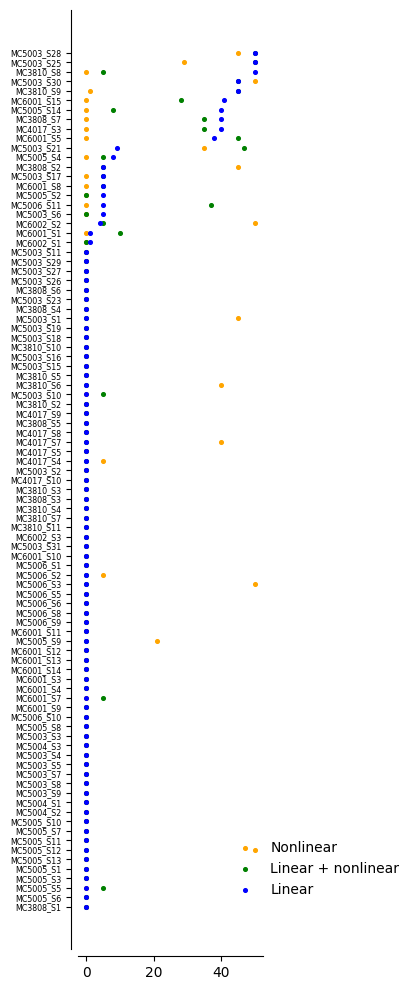

In [ ]:
# plot differently
order=np.argsort(times_selected[0,:]) # We take the linear model for order of neurons

fig, ax = plt.subplots(1,1,figsize=(4,10))
ax.scatter(times_selected[1,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Nonlinear', s=7, c='orange')
ax.scatter(times_selected[2,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear + nonlinear', s=7, c='green')
ax.scatter(times_selected[0,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear', s=7, c='blue')
ax.set_yticks(np.linspace(1,n_neurons,num=n_neurons))
ax.set_yticklabels(cell_names[order])
ax.tick_params(axis='y', which='major', labelsize=5.7)
ax.legend(frameon=False, loc=(.8,.05))
adjust_spines(ax,['left','bottom'])
plt.tight_layout()

#plt.savefig('selection_{}.png'.format(n_cells), dpi=200)
#plt.savefig('selection_{}.pdf'.format(n_cells))

What about the row $\mathbf{W}$ $\ell_2$ norms?

In [53]:
# checking
r=2
f=2
rep=0
l1_ratio_id=0
cvresults[r][7][f,rep,4,l1_ratio_id,:]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23199808, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.28898407, 0.40455715, 0.        , 0.29315   , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.40099965, 0.        , 0.4589436 ,
       0.        , 0.        , 0.44077932, 0.        , 0.        ,
       0.24886698, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.19409022, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20640062, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.23630167, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [94]:

total_models=0
weight_means = np.zeros((3,n_neurons))
weight_stds = np.zeros((3,n_neurons))
for i, cvresults in enumerate([purkinjecv_linear, purkinjecv_nonlinear, purkinjecv_full]):
    weights = []
    for r in range(1,ranks+1):
        for f in range(folds):
            for rep in range(reps):
                for a in range(alphas):
                    for l in range(l1_ratios):
                        weights.append(cvresults[r][7][f,rep,a,l,:][:,np.newaxis])
                        if i==0:
                            total_models+=1
    weights=np.concatenate(weights,axis=1)
    weight_means[i,:]=np.nanmean(weights,axis=1)
    weight_stds[i,:]=np.nanstd(weights,axis=1)

In [96]:
total_models

1040

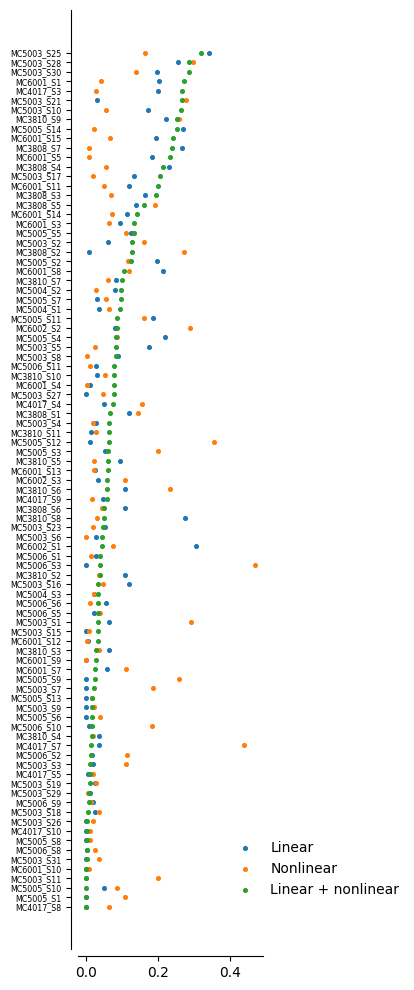

In [79]:
order=np.argsort(weight_means[2,:]) # We take the linear + nonlinear model for order of neurons

fig, ax = plt.subplots(1,1,figsize=(4,10))
ax.scatter(weight_means[0,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear', s=7)
ax.scatter(weight_means[1,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Nonlinear', s=7)
ax.scatter(weight_means[2,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear + nonlinear', s=7)

ax.set_yticks(np.linspace(1,n_neurons,num=n_neurons))
ax.set_yticklabels(cell_names[order])
ax.tick_params(axis='y', which='major', labelsize=5.7)
ax.legend(frameon=False, loc=(.8,.05))
adjust_spines(ax,['left','bottom'])
plt.tight_layout()

plt.savefig('weights.png', dpi=200)
plt.savefig('weights.pdf')

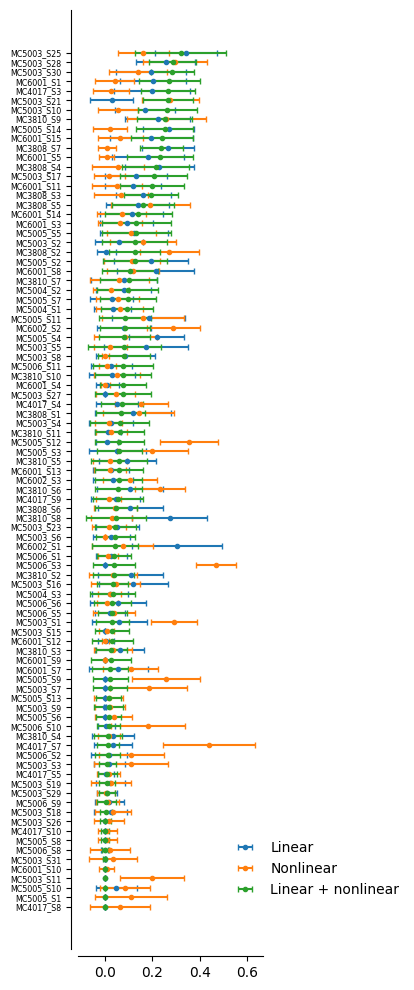

In [81]:
order=np.argsort(weight_means[2,:]) # We take the linear + nonlinear model for order of neurons

fig, ax = plt.subplots(1,1,figsize=(4,10))
ax.errorbar(weight_means[0,:][order], np.linspace(1,n_neurons,num=n_neurons),xerr=weight_stds[0,:][order],
            linestyle='None',marker='.',capsize=2, label='Linear')
ax.errorbar(weight_means[1,:][order], np.linspace(1,n_neurons,num=n_neurons),xerr=weight_stds[1,:][order],
            linestyle='None',marker='.',capsize=2, label='Nonlinear')
ax.errorbar(weight_means[2,:][order], np.linspace(1,n_neurons,num=n_neurons),xerr=weight_stds[2,:][order],
            linestyle='None',marker='.',capsize=2, label='Linear + nonlinear')

ax.set_yticks(np.linspace(1,n_neurons,num=n_neurons))
ax.set_yticklabels(cell_names[order])
ax.tick_params(axis='y', which='major', labelsize=5.7)
ax.legend(frameon=False, loc=(.8,.05))
adjust_spines(ax,['left','bottom'])
plt.tight_layout()

plt.savefig('weights_stds.png', dpi=200)
plt.savefig('weights_stds.pdf')

What about the row $\mathbf{W}$ $\ell_2$ norms for models that always select 10 cells?

In [97]:
total_models=0
weight_means = np.zeros((3,n_neurons))
weight_stds = np.zeros((3,n_neurons))
for i, cvresults in enumerate([purkinjecv_linear, purkinjecv_nonlinear, purkinjecv_full]):
    weights = []
    for r in range(1,ranks+1):
        for f in range(folds):
            for rep in range(reps):
                for l in range(l1_ratios):
                    a_index=np.nanargmin(np.abs(np.array(cvresults[r][2][f,rep,:,l])-n_cells))
                    weights.append(cvresults[r][7][f,rep,a_index,l,:][:,np.newaxis])
                    if i==0:
                        total_models+=1
    weights=np.concatenate(weights,axis=1)
    weight_means[i,:]=np.nanmean(weights,axis=1)
    weight_stds[i,:]=np.nanstd(weights,axis=1)

In [98]:
total_models

80

**ToDo**: why is it not 50 like above?

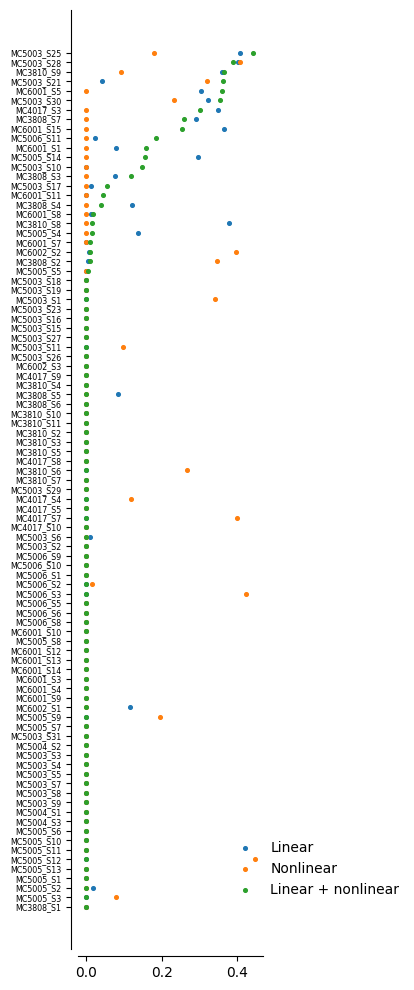

In [85]:
order=np.argsort(weight_means[2,:]) # We take the linear + nonlinear model for order of neurons

fig, ax = plt.subplots(1,1,figsize=(4,10))
ax.scatter(weight_means[0,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear', s=7)
ax.scatter(weight_means[1,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Nonlinear', s=7)
ax.scatter(weight_means[2,:][order], np.linspace(1,n_neurons,num=n_neurons), label='Linear + nonlinear', s=7)

ax.set_yticks(np.linspace(1,n_neurons,num=n_neurons))
ax.set_yticklabels(cell_names[order])
ax.tick_params(axis='y', which='major', labelsize=5.7)
ax.legend(frameon=False, loc=(.8,.05))
adjust_spines(ax,['left','bottom'])
plt.tight_layout()

plt.savefig('weights_{}.png'.format(n_cells), dpi=200)
plt.savefig('weights_{}.pdf'.format(n_cells))

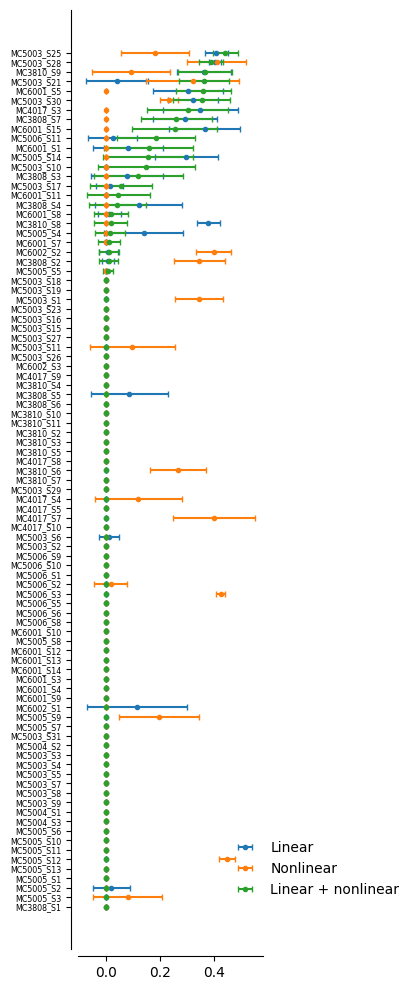

In [86]:
order=np.argsort(weight_means[2,:]) # We take the linear + nonlinear model for order of neurons

fig, ax = plt.subplots(1,1,figsize=(4,10))
ax.errorbar(weight_means[0,:][order], np.linspace(1,n_neurons,num=n_neurons),xerr=weight_stds[0,:][order],
            linestyle='None',marker='.',capsize=2, label='Linear')
ax.errorbar(weight_means[1,:][order], np.linspace(1,n_neurons,num=n_neurons),xerr=weight_stds[1,:][order],
            linestyle='None',marker='.',capsize=2, label='Nonlinear')
ax.errorbar(weight_means[2,:][order], np.linspace(1,n_neurons,num=n_neurons),xerr=weight_stds[2,:][order],
            linestyle='None',marker='.',capsize=2, label='Linear + nonlinear')

ax.set_yticks(np.linspace(1,n_neurons,num=n_neurons))
ax.set_yticklabels(cell_names[order])
ax.tick_params(axis='y', which='major', labelsize=5.7)
ax.legend(frameon=False, loc=(.8,.05))
adjust_spines(ax,['left','bottom'])
plt.tight_layout()

plt.savefig('weights_stds_{}.png'.format(n_cells), dpi=200)
plt.savefig('weights_stds_{}.pdf'.format(n_cells))